# Курс "Python для анализа данных"

---
#3.3.4 Решение некоторых задач математического анализа

## Где мы сейчас?


<html>
 <head>
  <meta charset="utf-8">
 </head>
 <body>
  <ul>
    <li>1. Введение в анализ данных и разработку на языке Python </li> <!-2.1->
    <li>2. Основы языка </li> <!-2.1->
    <li>3. <strong>Библиотеки NumPy и SciPy для решения задач анализа данных и машинного обучения</strong> <i><- Вот в этой главе!</i>
     <ul>
      <li>3.1 Математические дисциплины в анализе данных и машинном обучении</li>      
      <li>3.2 Основной объект NumPy ndarray</li>
      <li><strong>3.3 Библиотека SciPy</strong> <i><- Вот в этом параграфе!</i></li>
       <ul>
        <li>3.3.1 Обзор основных пакетов библиотеки SciPy</li>
        <li>3.3.2 Решение некоторых задач линейной алгебры</li>
        <li>3.3.3 Решение некоторых задач математической статистики</li>
        <li><strong>3.3.4 Решение некоторых задач математического анализа</strong><i> <- Вот в этом пункте!</i></li>
        <li>3.3.5 Решение специальных задач из области анализа данных и машинного обучения</li>
       </ul>
     </ul>
    </li>   
  </ul>
 </body>
</html>







## О чем будем говорить?


О том, как можно применять методы библиотеки ```scipy``` в решении задач оптимизации, подсчета интегралов и интерполяции. 

## Ключевые слова, понятия и выражения






*    ```scipy.integrate```
*    ```scipy.optimize```
*    ```scipy.interpolate```
*    ```scipy.misc```

## Материал

### Производные и интегралы

Производная функции одной переменной

In [ ]:
from scipy.misc import derivative
def f(x):
  return x**3 + x**2
derivative(f, 1.0, dx=1e-6)

4.999999999921734

Описание модуля ```scipy.integrate```

In [ ]:
from scipy import integrate
help(integrate)

Help on package scipy.integrate in scipy:

NAME
    scipy.integrate

DESCRIPTION
    Integration and ODEs (:mod:`scipy.integrate`)
    
    .. currentmodule:: scipy.integrate
    
    Integrating functions, given function object
    
    .. autosummary::
       :toctree: generated/
    
       quad          -- General purpose integration
       quad_vec      -- General purpose integration of vector-valued functions
       dblquad       -- General purpose double integration
       tplquad       -- General purpose triple integration
       nquad         -- General purpose n-dimensional integration
       fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
       quadrature    -- Integrate with given tolerance using Gaussian quadrature
       romberg       -- Integrate func using Romberg integration
       quad_explain  -- Print information for use of quad
       newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
       IntegrationWarning -- Wa

Определенный интеграл 

In [ ]:
result = integrate.quad(lambda x: x, 0, 1)
print(result)

(0.5, 5.551115123125783e-15)


Двойной интеграл

![alt text](https://drive.google.com/uc?id=1FylPik7wyI7qPkcudNkNzuf0jmDCM2ax)

In [ ]:
area = integrate.dblquad(lambda x, y: x*y,
               0, 0.5, 
               lambda x: 0, lambda x: 1-2*x)
print(area)
print(1/96)

(0.010416666666666668, 4.101620128472366e-16)
0.010416666666666666


### Оптимизация

In [ ]:
from scipy.optimize import minimize

def func(x):
  return (x - 1)**2 + 4

Минимизация **Nelder-Mead Simplex algorithm**

In [ ]:
x0=10
res = minimize(func, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})
print(res)

Optimization terminated successfully.
         Current function value: 4.000000
         Iterations: 33
         Function evaluations: 67
 final_simplex: (array([[1.        ],
       [1.00000001]]), array([4., 4.]))
           fun: 4.0
       message: 'Optimization terminated successfully.'
          nfev: 67
           nit: 33
        status: 0
       success: True
             x: array([1.])


Минимизация **Broyden-Fletcher-Goldfarb-Shanno algorithm**

In [ ]:
x0=10
def func_der(x):
  return 2*(x - 1)

res = minimize(func, x0, method='BFGS',
               jac=func_der,
               options={'disp': False})
print(res)

      fun: 4.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 5
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([1.])


Минимизация **Newton-Conjugate-Gradient algorithm**

In [ ]:
def func_Hes(x):
  return 2.0

res = minimize(func, x0, method='Newton-CG',
               jac=func_der,
               hess=func_Hes,
               options={'xtol': 1e-8,'disp': False})
print(res)

     fun: array([4.])
     jac: array([0.])
 message: 'Optimization terminated successfully.'
    nfev: 3
    nhev: 2
     nit: 2
    njev: 4
  status: 0
 success: True
       x: array([1.])


### Интерполяция

Интерполяция функции одной переменной

In [ ]:
from scipy.interpolate import interp1d
import numpy as np

In [ ]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(x)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

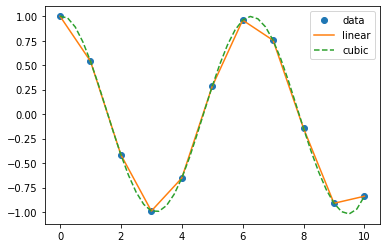

In [ ]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

Интерполяция функции многих переменных

In [ ]:
def func(x, y):
  return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [ ]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

In [ ]:
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

In [ ]:
from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

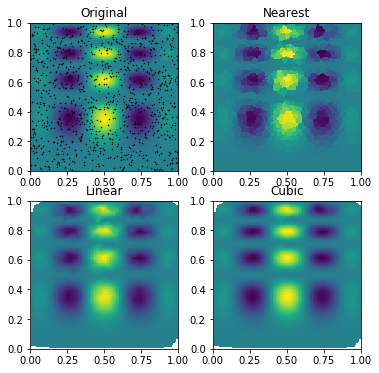

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

## Дополнительные материалы и литература



*   https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html
*   https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html